# **Analysis Customer Personality**

### **1. Import Library**

In [41]:
# data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.metrics.cluster._unsupervised import silhouette_score
from sklearn.metrics._classification import confusion_matrix


### **2. Import Dataset**

In [42]:
dataset = pd.read_csv("marketing_campaign.csv", sep=";")
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### **3. Data Deskription**

In [43]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [45]:
dataset.shape

(2240, 29)

In [46]:
dataset.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### **4. Data Exploration and  Visualization**

In [47]:
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'], dayfirst = True)

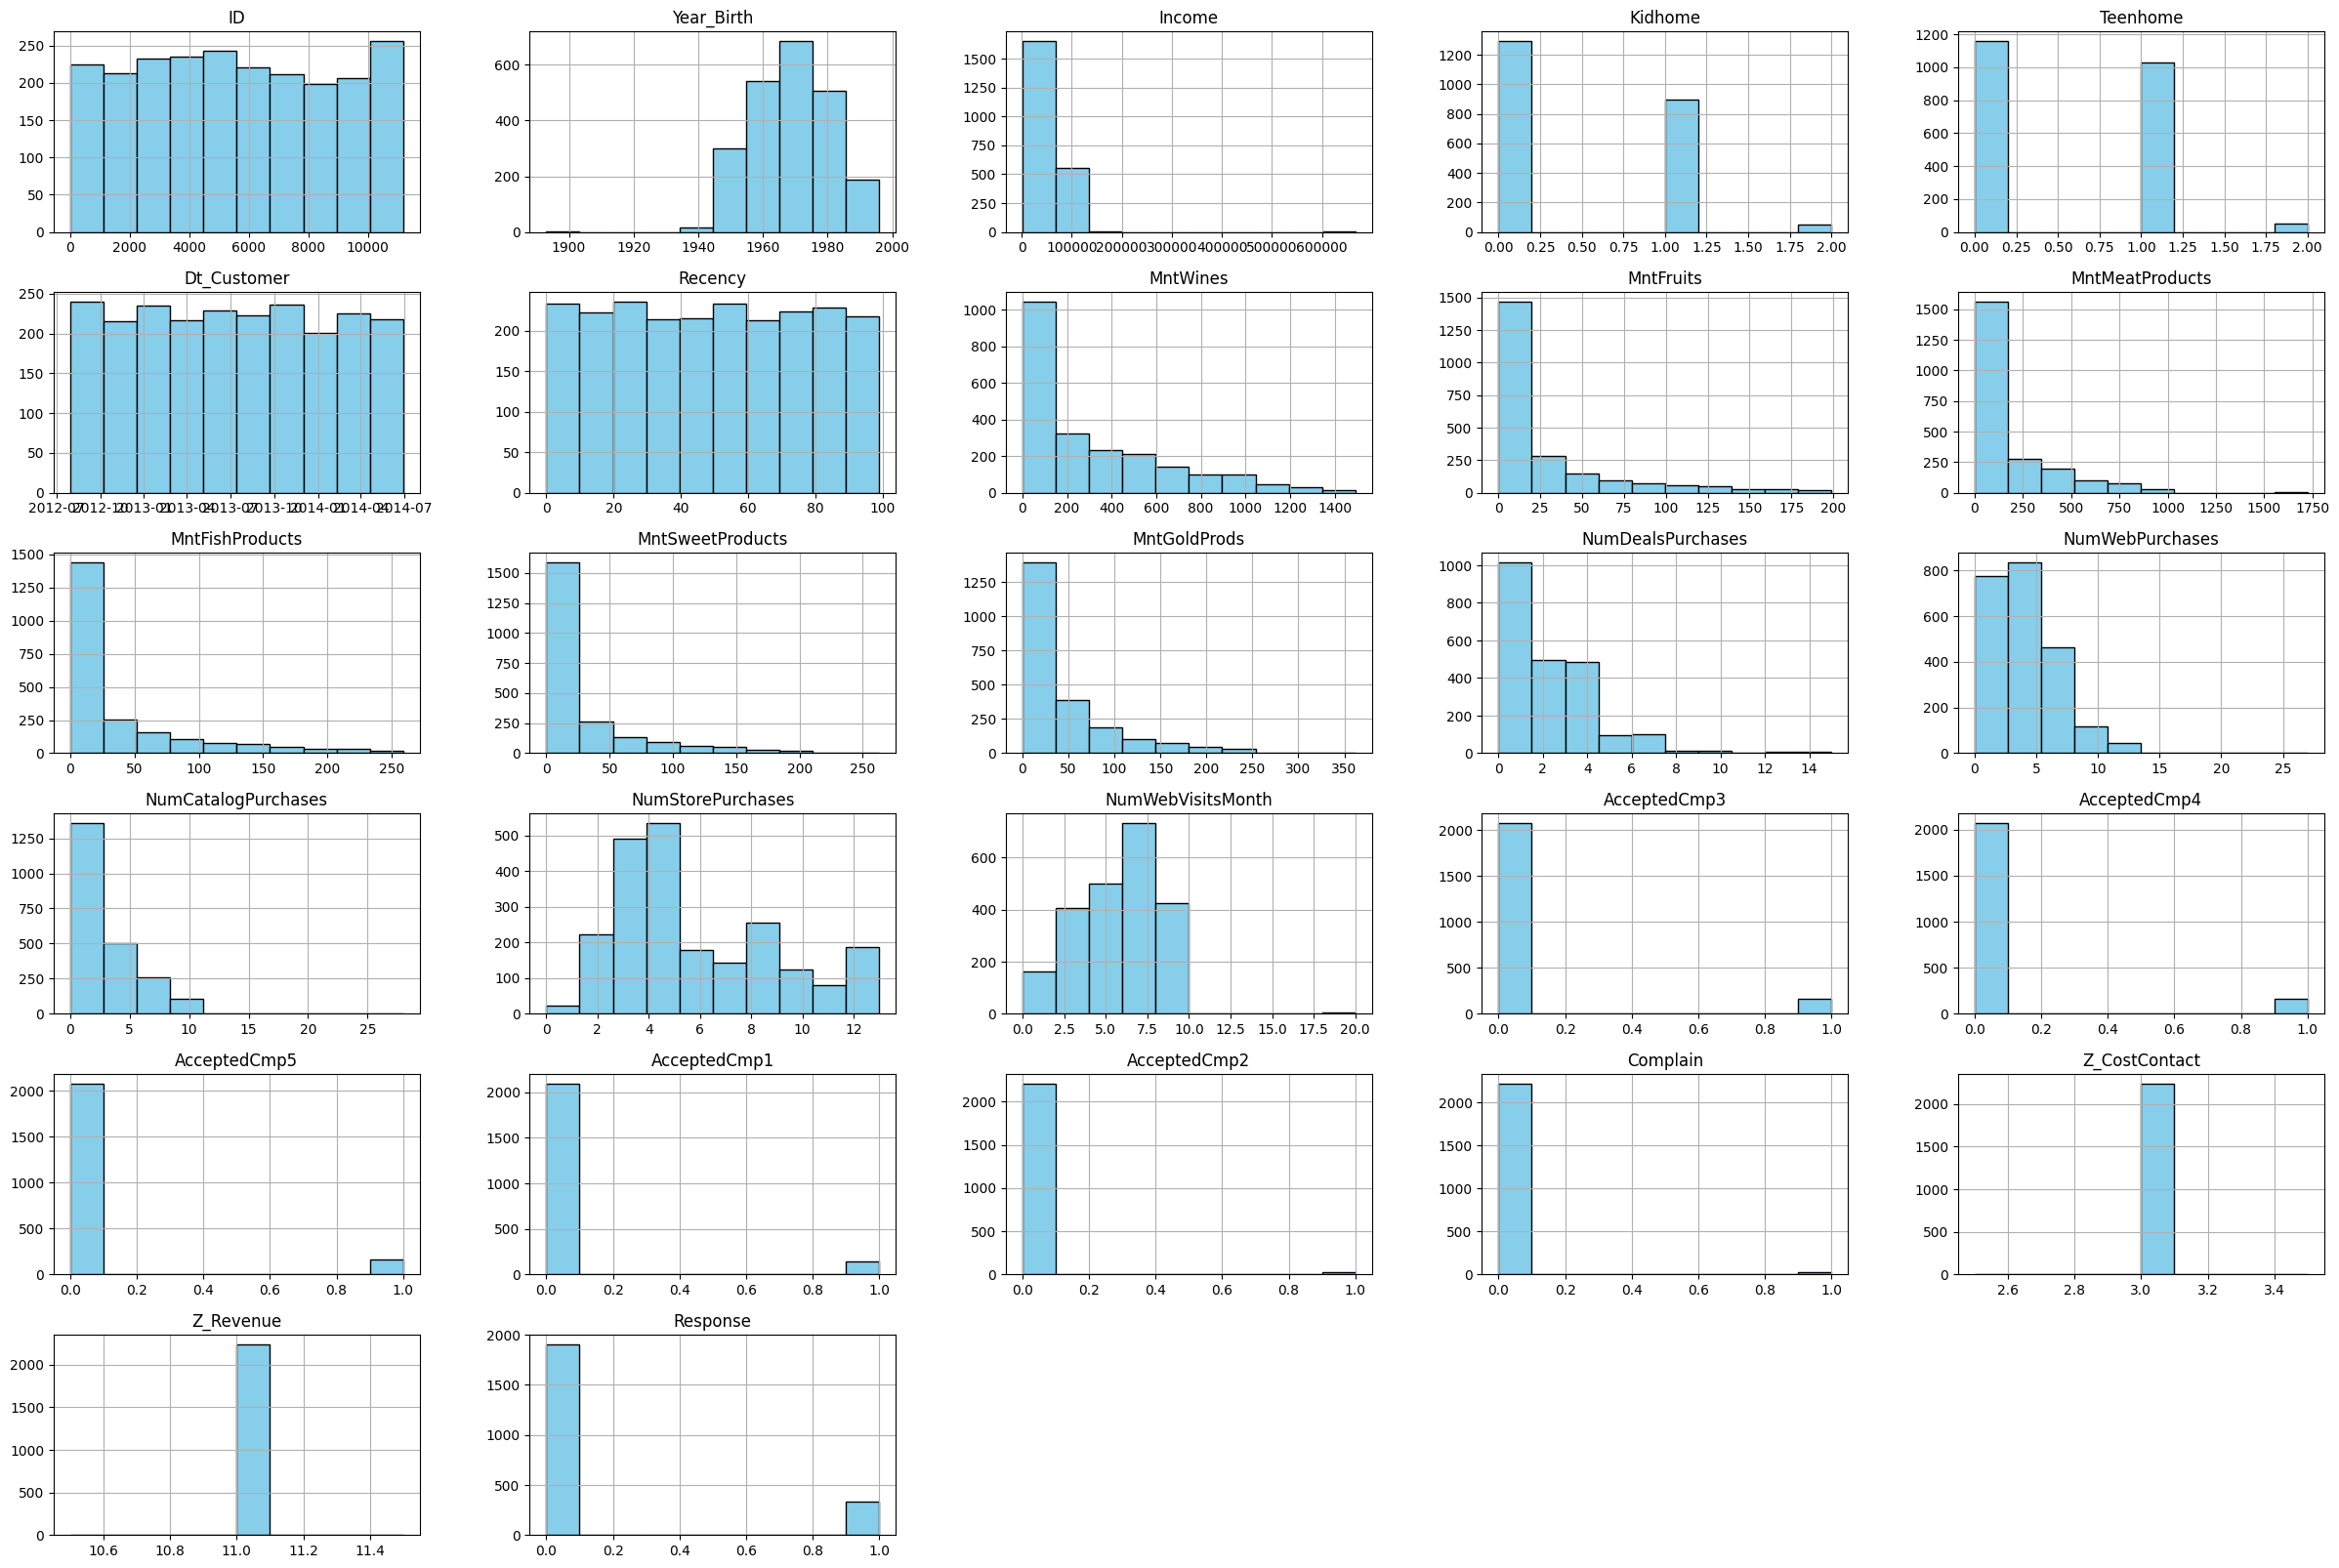

In [48]:
dataset.hist(figsize=(30,20), color="skyblue", edgecolor='black')
plt.show()

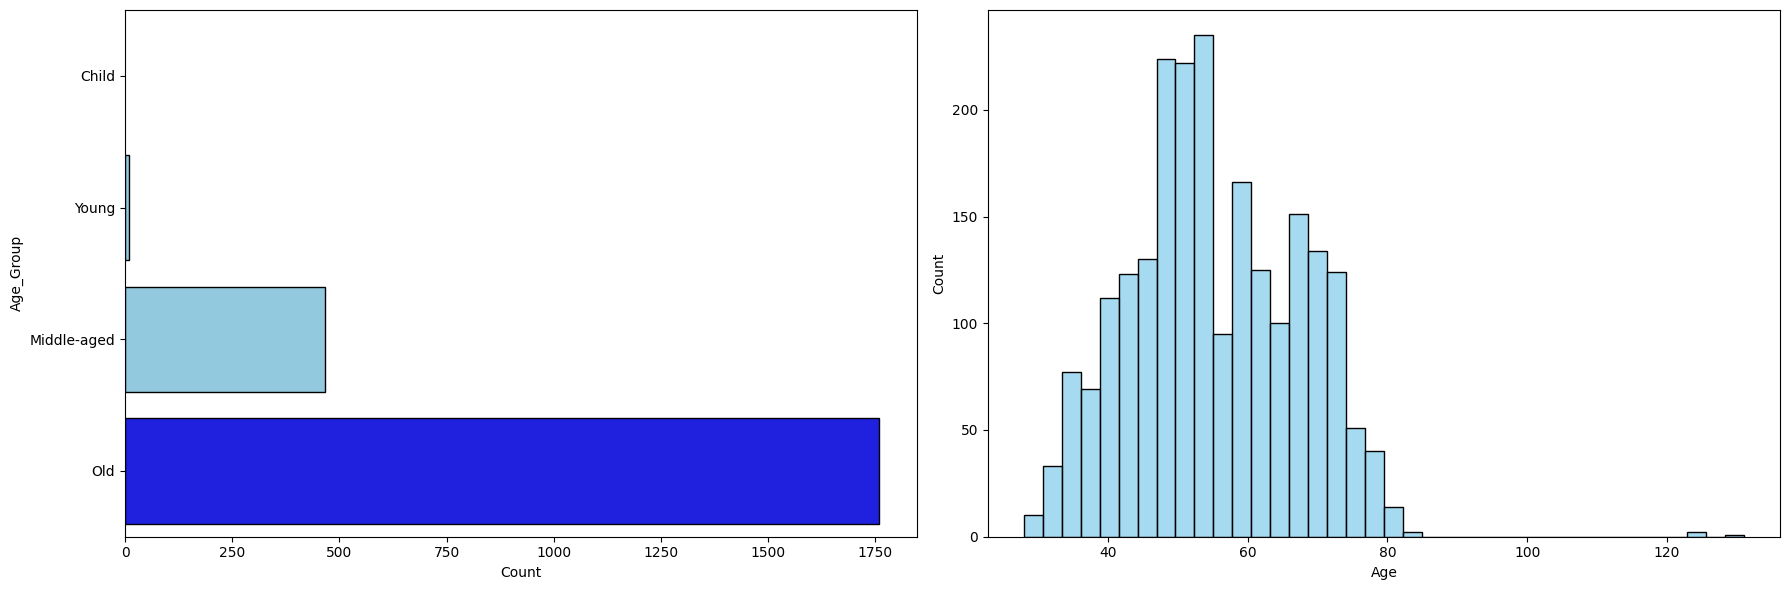

In [49]:
current_date = dt.date.today()
current_year = current_date.year

dataset['Age'] = current_year - dataset['Year_Birth']
dataset['Age_Groups'] = pd.cut(x= dataset['Age'], 
                          bins=[0, 16, 30, 45, 116], 
                          labels=['Child', 'Young', 'Middle-aged', 'Old'])

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

age_grouped_df = dataset.groupby('Age_Groups').size().reset_index()
age_grouped_df = age_grouped_df.rename(columns={'Age_Groups': 'Age_Group', 0: 'Count'}).sort_values(by='Count', ascending=False).reset_index(drop=True)
age_grouped_df = age_grouped_df.drop(age_grouped_df[age_grouped_df['Count'] == 0].index)

age_grouped_df

sns.barplot(ax=axes[0], data=age_grouped_df, y='Age_Group', x='Count', palette=['skyblue' if x!='Old' else 'b' for x in age_grouped_df['Age_Group']], edgecolor='black')
sns.histplot(ax=axes[1], data=dataset['Age'], color='skyblue')

plt.tight_layout()
plt.show()

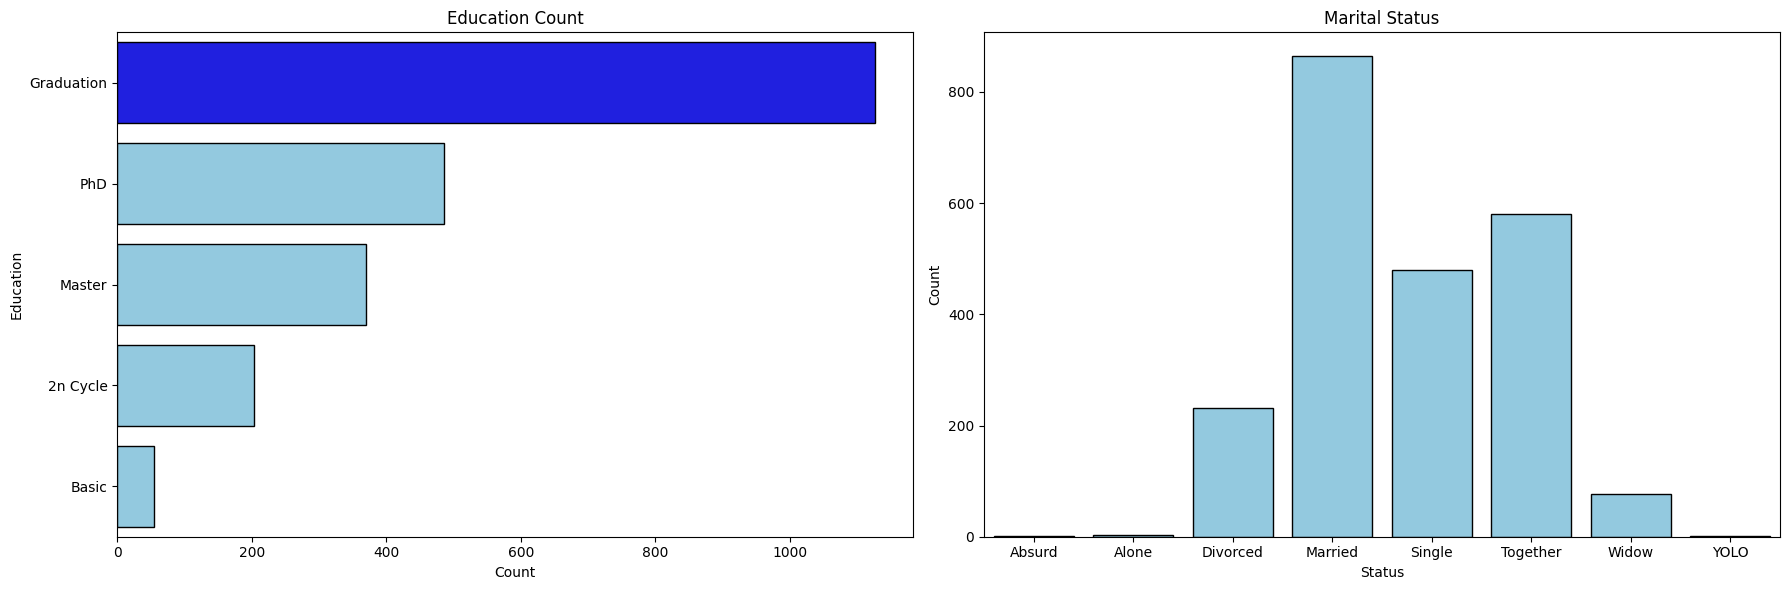

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

edu_grouped_df = dataset.groupby('Education').size().reset_index()
edu_grouped_df = edu_grouped_df.rename(columns={'Education': 'Education', 0: 'Count'}).sort_values(by='Count', ascending=False)

sns.barplot(ax=axes[0], data=edu_grouped_df, y='Education', x='Count', palette=["skyblue" if x!='Graduation' else 'b' for x in edu_grouped_df['Education']], edgecolor='black' )
axes[0].set_title('Education Count')

marital_df = dataset.groupby('Marital_Status').size().reset_index()
marital_df = marital_df.rename(columns={'Marital_Status': 'Status', 0: 'Count'})
marital_df['Percent'] = marital_df['Count'] / sum(marital_df['Count'])

sns.barplot(ax=axes[1], data=marital_df, x='Status', y='Count', color='skyblue', edgecolor='black') 
axes[1].set_title('Marital Status')

plt.tight_layout()
plt.show()


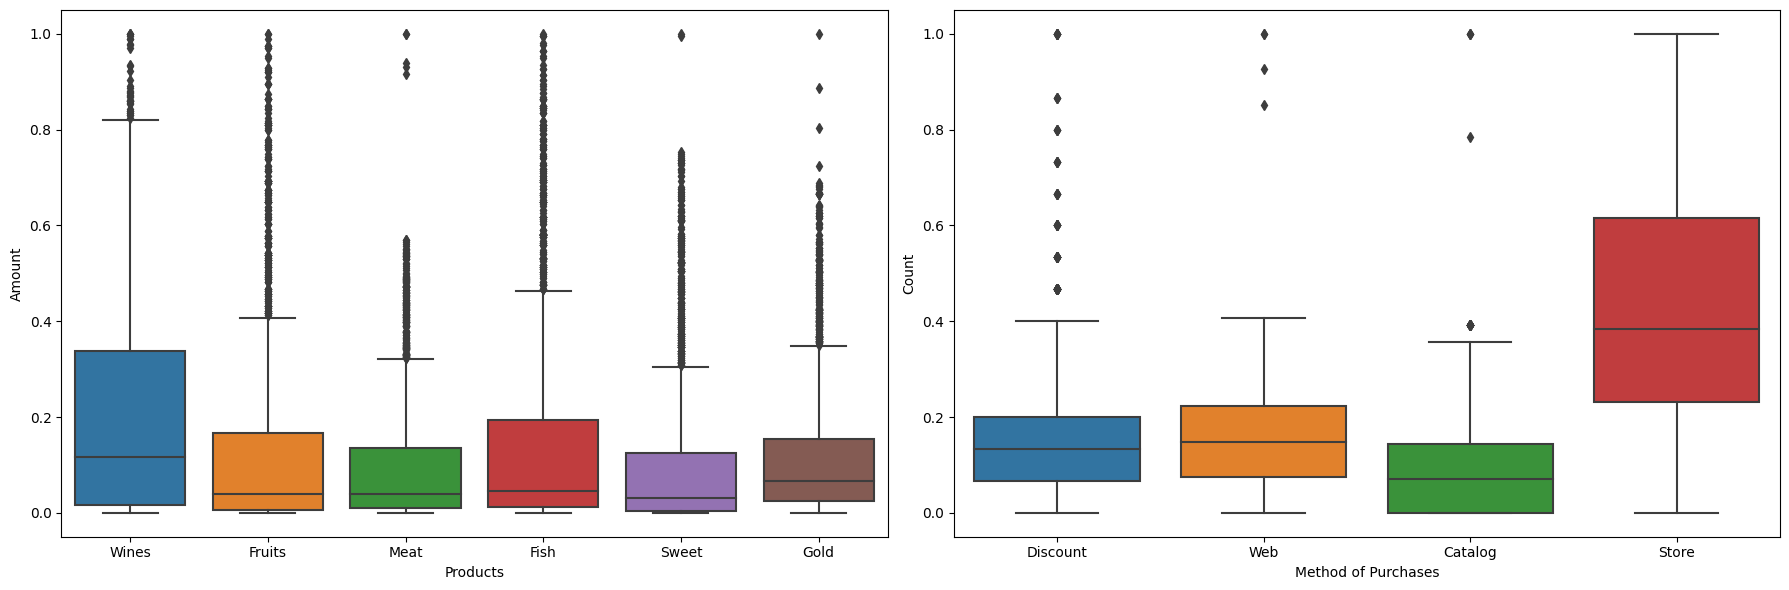

In [51]:
scaler = MinMaxScaler()

products=dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
scaled_products=scaler.fit_transform(products)

purchases=dataset[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
scaled_purchases=scaler.fit_transform(purchases)

df_products=pd.DataFrame(data=scaled_products, columns=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'])
df_purchases=pd.DataFrame(data=scaled_purchases, columns=['Discount', 'Web', 'Catalog', 'Store'])

fig, axes=plt.subplots(1,2, figsize = (18 ,6))

sns.boxplot(ax=axes[0], x="variable", y="value", data=pd.melt(df_products))
sns.boxplot(ax=axes[1], x="variable", y="value", data=pd.melt(df_purchases))

axes[0].set(xlabel='Products', ylabel='Amount')
axes[1].set(xlabel='Method of Purchases', ylabel='Count')

plt.tight_layout()
plt.show()

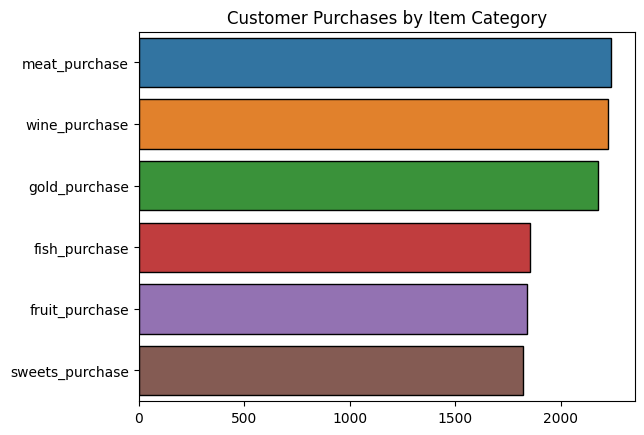

In [52]:
wine_purchase = dataset[dataset['MntWines'] != 0]
fruit_purchase =  dataset[dataset['MntFruits'] != 0]
meat_purchase =  dataset[dataset['MntMeatProducts'] != 0]
fish_purchase =  dataset[dataset['MntFishProducts'] != 0]
sweets_purchase =  dataset[dataset['MntSweetProducts'] != 0]
gold_purchase =  dataset[dataset['MntGoldProds'] != 0]

category_purchase = pd.DataFrame({
    'wine_purchase' : wine_purchase['MntWines'],
    'fruit_purchase' : fruit_purchase['MntFruits'],
    'meat_purchase' : meat_purchase['MntMeatProducts'],
    'fish_purchase' : fish_purchase['MntFishProducts'],
    'sweets_purchase' : sweets_purchase['MntSweetProducts'],
    'gold_purchase' : gold_purchase['MntGoldProds']
})

total_purchase = category_purchase.agg({
    'wine_purchase' : 'count',
    'fruit_purchase' : 'count',
    'meat_purchase' : 'count',
    'fish_purchase' : 'count',
    'sweets_purchase' : 'count',
    'gold_purchase': 'count'
}).sort_values(ascending = False)

sns.barplot(x = total_purchase,y = total_purchase.index, edgecolor='black')
plt.title('Customer Purchases by Item Category')
plt.show()

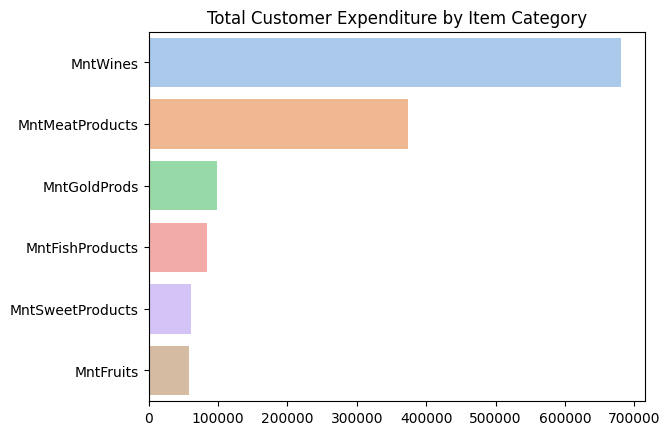

In [53]:
total_spent = dataset.agg({
    'MntWines' : 'sum',
    'MntFruits' : 'sum',
    'MntMeatProducts' : 'sum',
    'MntFishProducts' : 'sum',
    'MntSweetProducts' : 'sum',
    'MntGoldProds': 'sum'
}).sort_values(ascending = False)

sns.barplot(x = total_spent,y = total_spent.index, palette='pastel')
plt.title('Total Customer Expenditure by Item Category')
plt.show()

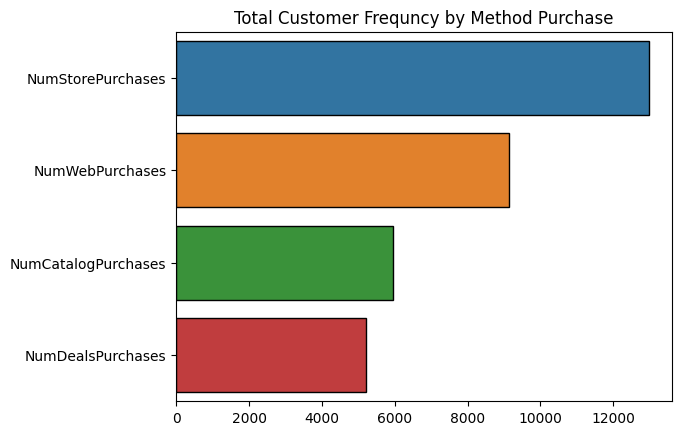

In [54]:
total_spent = dataset.agg({
    'NumDealsPurchases' : 'sum',
    'NumWebPurchases' : 'sum',
    'NumCatalogPurchases': 'sum',
    'NumStorePurchases' : 'sum'
}).sort_values(ascending = False)

sns.barplot(x = total_spent,y = total_spent.index, edgecolor='black')
plt.title('Total Customer Frequncy by Method Purchase')
plt.show()

In [55]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Groups
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,67,Old
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,70,Old
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,59,Old
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,40,Middle-aged
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,43,Middle-aged


### **5. Feature Selection**

In [56]:
data_rfm = dataset[['Dt_Customer','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

In [57]:
data_rfm

,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4
1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2
2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10
3,2014-02-10,26,11,4,20,10,3,5,2,2,0,4
4,2014-01-19,94,173,43,118,46,27,15,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2013-06-13,46,709,43,182,42,118,247,2,9,3,4
2236,2014-06-10,56,406,0,30,0,0,8,7,8,2,5
2237,2014-01-25,91,908,48,217,32,12,24,1,2,3,13
2238,2014-01-24,8,428,30,214,80,30,61,2,6,5,10


In [58]:
data_rfm = data_rfm.dropna()

In [59]:
data_rfm["Frequency"] = data_rfm["NumDealsPurchases"] + data_rfm["NumWebPurchases"] + data_rfm["NumCatalogPurchases"] + data_rfm["NumStorePurchases"]

In [60]:
data_rfm['Monetary'] = data_rfm["MntWines"]+ data_rfm["MntFruits"]+ data_rfm["MntMeatProducts"]+ data_rfm["MntFishProducts"]+ data_rfm["MntSweetProducts"]+ data_rfm["MntGoldProds"]

In [61]:
data_rfm = data_rfm.drop(['Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1)

In [62]:
data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    2240 non-null   int64
 1   Frequency  2240 non-null   int64
 2   Monetary   2240 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


In [63]:
data_rfm

,Recency,Frequency,Monetary
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422
...,...,...,...
2235,46,18,1341
2236,56,22,444
2237,91,19,1241
2238,8,23,843


### **12. Remove Outliers**

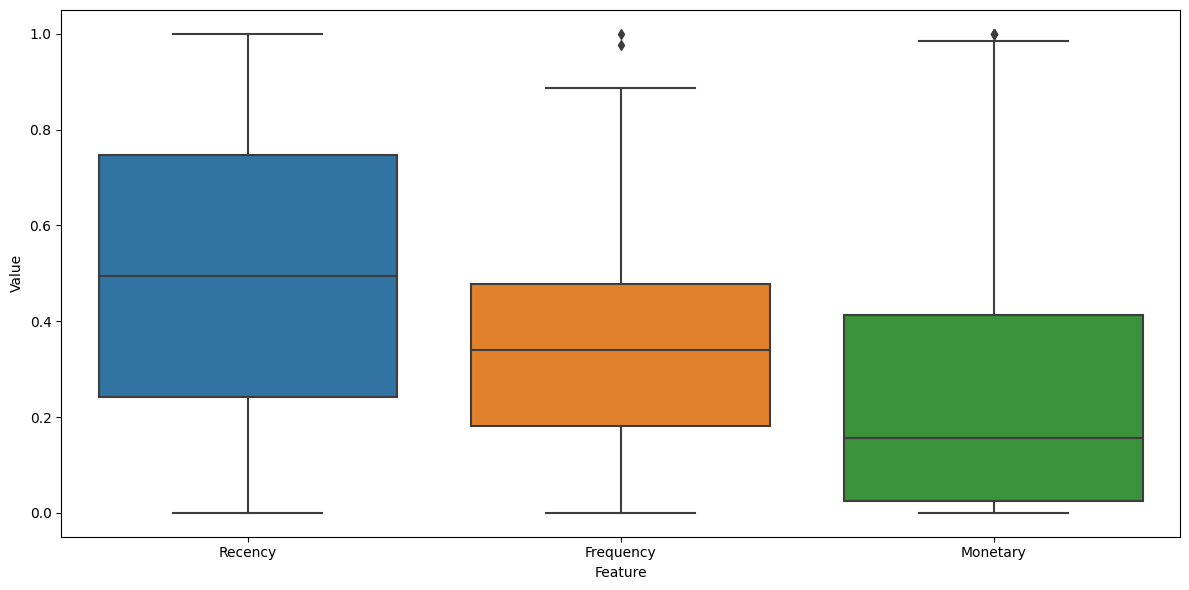

In [64]:
scaler = MinMaxScaler()

segmentation=data_rfm[['Recency', 'Frequency', 'Monetary']]
scaled_segment=scaler.fit_transform(segmentation)

customer_segmentation = pd.DataFrame(data=scaled_segment, columns=['Recency', 'Frequency', 'Monetary'])

fig, axes=plt.subplots(1, figsize = (12 ,6))

sns.boxplot(ax=axes, x="variable", y="value", data=pd.melt(customer_segmentation))

axes.set(xlabel='Feature', ylabel='Value')

plt.tight_layout()
plt.show()

In [65]:
# Mendefinisikan ambang batas outlier (misalnya, di atas 1.5 kali jarak antar kuartil)
q1 = customer_segmentation['Frequency'].quantile(0.25)
q3 = customer_segmentation['Frequency'].quantile(0.75)
iqr = q3 - q1
outlier_threshold = 1.5 * iqr

# Mengidentifikasi outlier
outliers = customer_segmentation[(customer_segmentation['Frequency'] < q1 - outlier_threshold) | (customer_segmentation['Frequency'] > q3 + outlier_threshold)]

# Menghapus baris dengan outlier
customer = customer_segmentation.drop(outliers.index)

# Menampilkan DataFrame yang sudah dibersihkan
customer

,Recency,Frequency,Monetary
0,0.585859,0.568182,0.639683
1,0.383838,0.136364,0.008730
2,0.262626,0.477273,0.305952
3,0.262626,0.181818,0.019048
4,0.949495,0.431818,0.165476
...,...,...,...
2235,0.464646,0.409091,0.530159
2236,0.565657,0.500000,0.174206
2237,0.919192,0.431818,0.490476
2238,0.080808,0.522727,0.332540


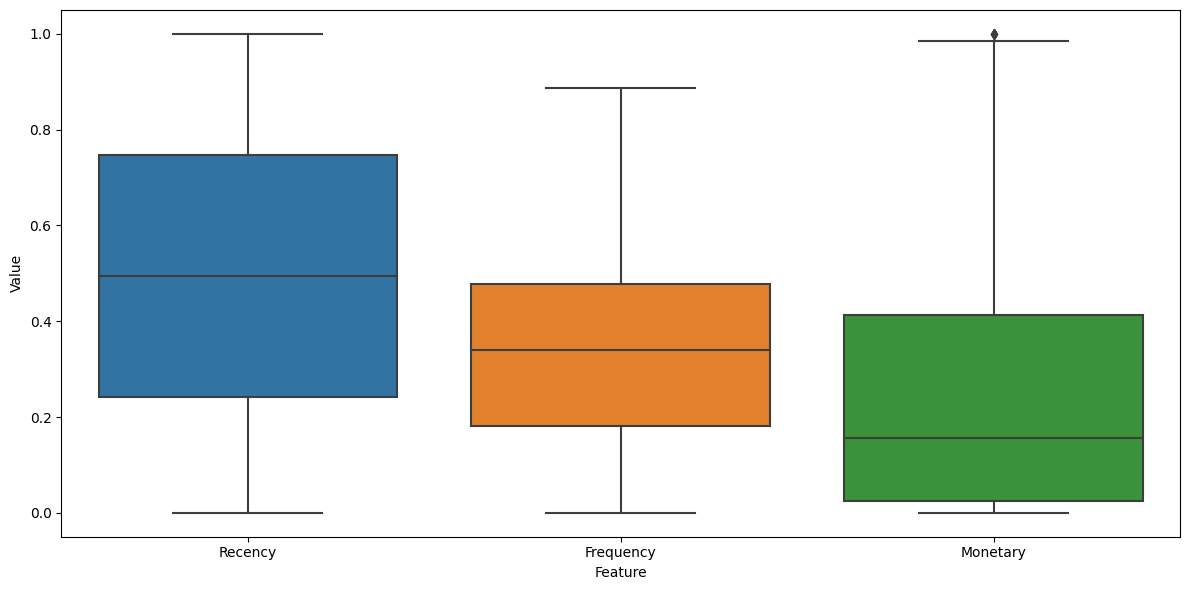

In [66]:
fig, axes=plt.subplots(1, figsize = (12 ,6))

sns.boxplot(ax=axes, x="variable", y="value", data=pd.melt(customer))

axes.set(xlabel='Feature', ylabel='Value')

plt.tight_layout()
plt.show()

In [67]:
# Mendefinisikan ambang batas outlier (misalnya, di atas 1.5 kali jarak antar kuartil)
q1 = customer['Monetary'].quantile(0.25)
q3 = customer['Monetary'].quantile(0.75)
iqr = q3 - q1
outlier_threshold = 1.5 * iqr

# Mengidentifikasi outlier
outliers = customer[(customer['Monetary'] < q1 - outlier_threshold) | (customer['Monetary'] > q3 + outlier_threshold)]

# Menghapus baris dengan outlier
customer = customer.drop(outliers.index)

# Menampilkan DataFrame yang sudah dibersihkan
customer

,Recency,Frequency,Monetary
0,0.585859,0.568182,0.639683
1,0.383838,0.136364,0.008730
2,0.262626,0.477273,0.305952
3,0.262626,0.181818,0.019048
4,0.949495,0.431818,0.165476
...,...,...,...
2235,0.464646,0.409091,0.530159
2236,0.565657,0.500000,0.174206
2237,0.919192,0.431818,0.490476
2238,0.080808,0.522727,0.332540


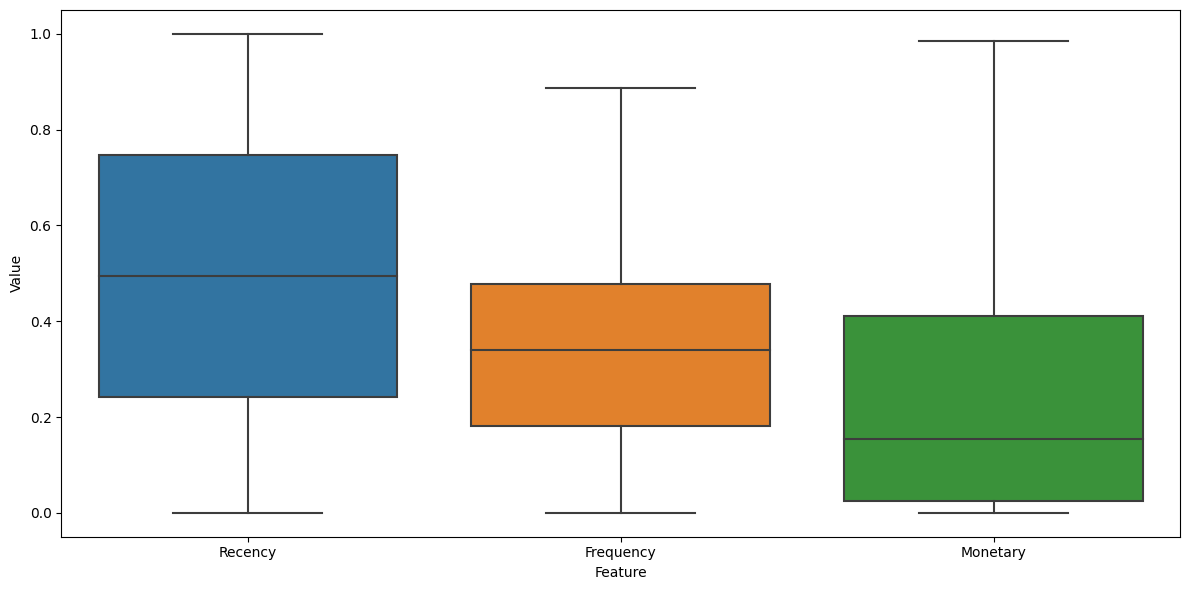

In [68]:
fig, axes=plt.subplots(1, figsize = (12 ,6))

sns.boxplot(ax=axes, x="variable", y="value", data=pd.melt(customer))

axes.set(xlabel='Feature', ylabel='Value')

plt.tight_layout()
plt.show()

In [69]:
# Menyimpan parameter skala asli
min_original = scaler.data_min_
max_original = scaler.data_max_

# Mengembalikan data yang telah di-scaling ke dalam skala asli
data_rfm = (customer * (max_original - min_original)) + min_original


In [70]:
data_rfm = data_rfm.astype(int)

In [71]:
data_rfm

,Recency,Frequency,Monetary
0,58,25,1617
1,38,6,27
2,26,21,776
3,26,8,53
4,94,19,422
...,...,...,...
2235,46,18,1341
2236,56,22,444
2237,91,19,1241
2238,8,23,843


In [72]:
print("Customer's Recency Average: ", data_rfm['Recency'].mean())
print("Customer's Recency Median: ", data_rfm['Recency'].median())

Customer's Recency Average:  49.137360178970916
Customer's Recency Median:  49.0


In [73]:
print("Customer's Frequency Average: ", data_rfm['Frequency'].mean())
print("Customer's Frequency Median: ", data_rfm['Frequency'].median())

Customer's Frequency Average:  14.827293064876958
Customer's Frequency Median:  15.0


In [74]:
print("Customer's Monetary Average: ", data_rfm['Monetary'].mean())
print("Customer's Monetary Median: ", data_rfm['Monetary'].median())

Customer's Monetary Average:  602.1780760626398
Customer's Monetary Median:  395.0


### **6. Visualization RFM Before Clustering**

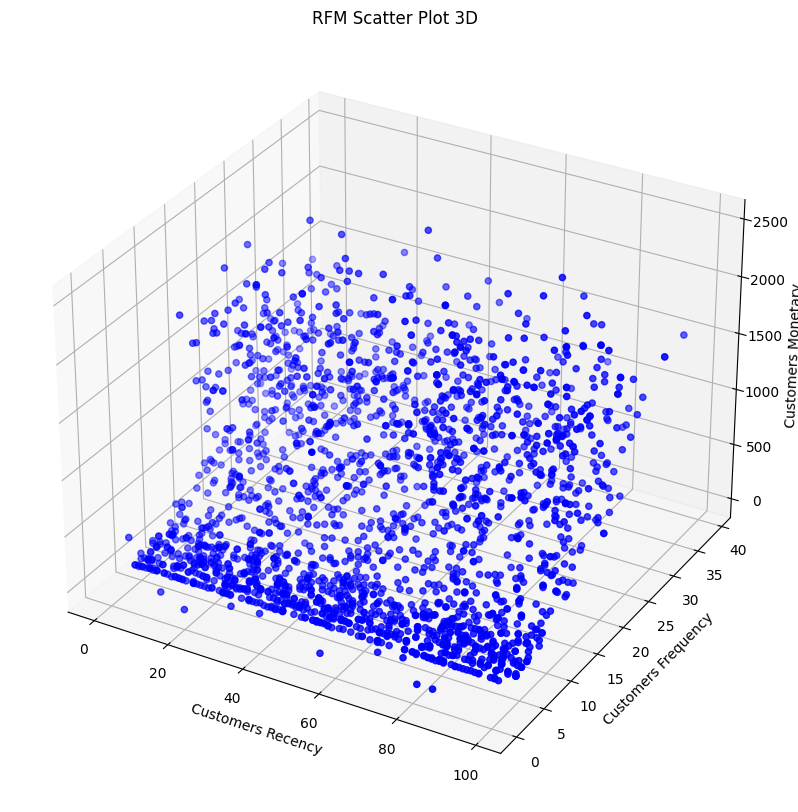

In [75]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Menambahkan titik-titik ke plot
ax.scatter(data_rfm["Recency"], data_rfm["Frequency"], data_rfm["Monetary"], c='b', marker='o')  # 'c' adalah warna, 'marker' adalah bentuk titik

# Mengatur label sumbu
ax.set_xlabel('Customers Recency')
ax.set_ylabel('Customers Frequency')
ax.set_zlabel('Customers Monetary')
plt.title("RFM Scatter Plot 3D")

# Menampilkan plot
plt.show()

In [76]:
cltv = data_rfm.iloc[:, :].values

### **7. Elbow Method**

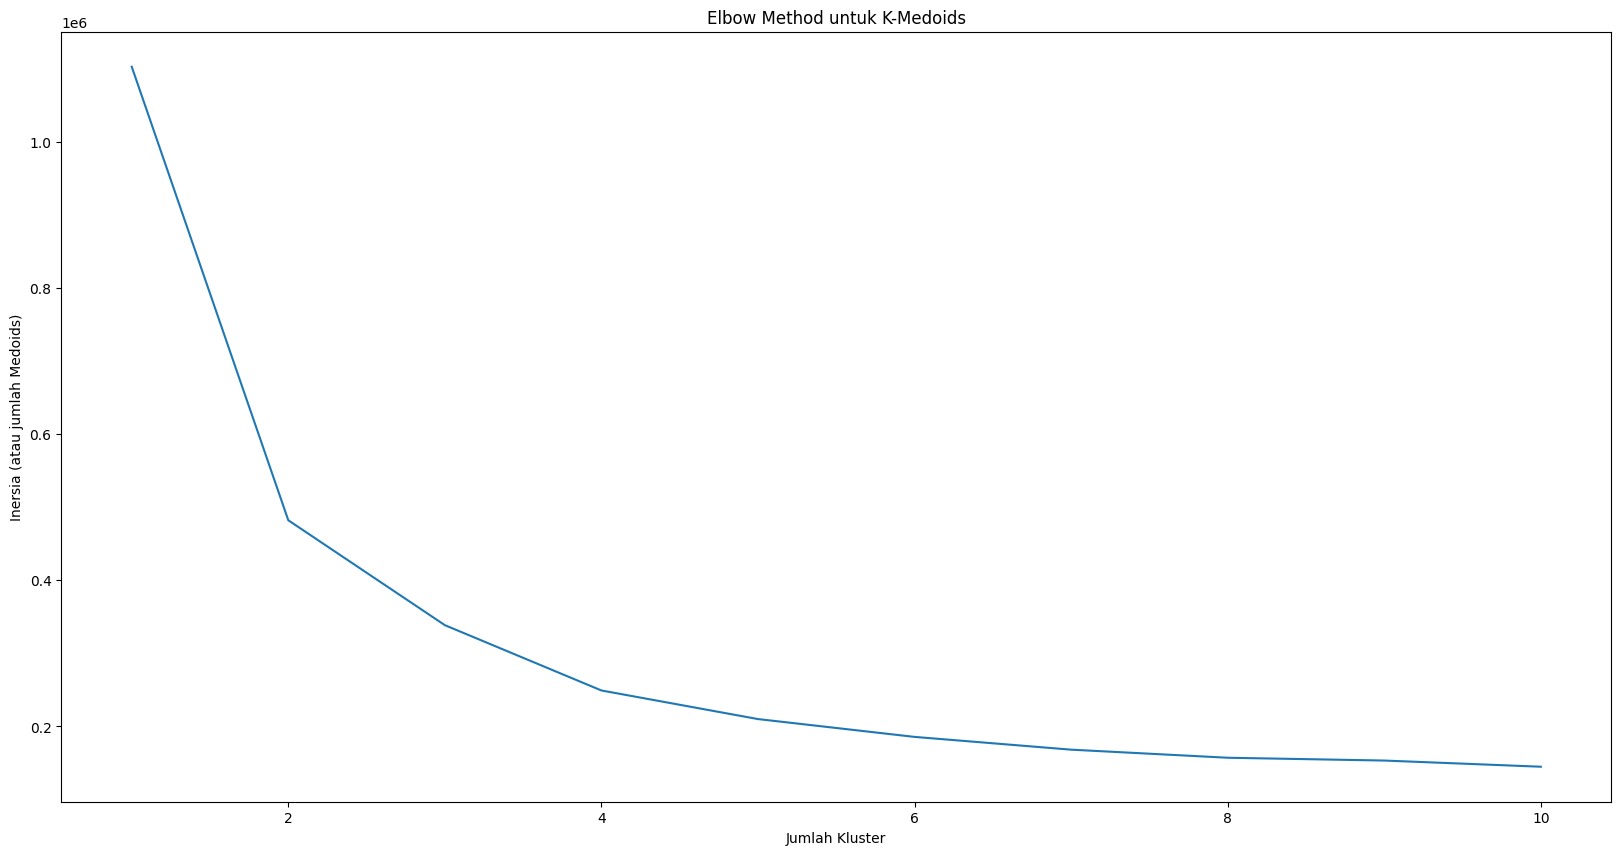

In [77]:
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import numpy as np
# List untuk menyimpan inersia atau jumlah medoids
inertia = []

for i in range(1, 11):
        kmedoids = KMedoids(n_clusters=i, random_state=0)
        kmedoids.fit(cltv)
        inertia.append(kmedoids.inertia_)

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(range(1, 11), inertia)
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia (atau jumlah Medoids)')
plt.title('Elbow Method untuk K-Medoids')
plt.show()

### **8. Modelling**

In [78]:
kmedoids = KMedoids(n_clusters=4, random_state=0, max_iter=700)
cluster_result = kmedoids.fit_predict(cltv)
cluster_result

array([3, 1, 2, ..., 2, 2, 1], dtype=int64)

In [79]:
data_rfm['Cluster']=cluster_result
data_rfm

,Recency,Frequency,Monetary,Cluster
0,58,25,1617,3
1,38,6,27,1
2,26,21,776,2
3,26,8,53,1
4,94,19,422,0
...,...,...,...,...
2235,46,18,1341,3
2236,56,22,444,0
2237,91,19,1241,2
2238,8,23,843,2


In [80]:
kmedoids.cluster_centers_

array([[  52.,   18.,  450.],
       [  47.,    8.,   63.],
       [  55.,   21., 1004.],
       [  54.,   21., 1617.]])

### **9. Visualization RFM Clustering Result**

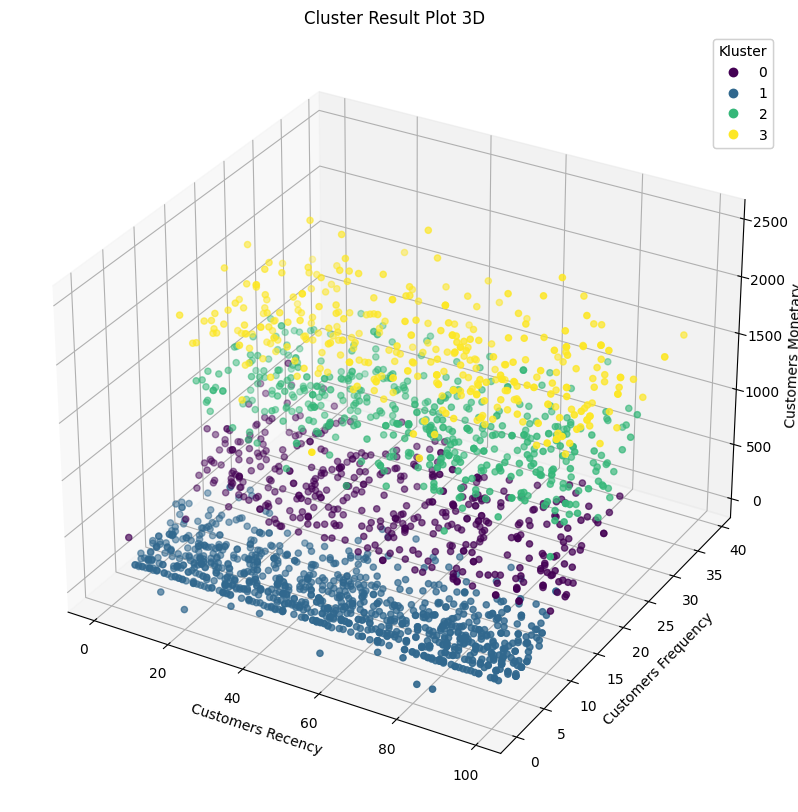

In [81]:
fig= plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Mewarnai titik-titik data berdasarkan label kluster
scatter = ax.scatter(cltv[:, 0], cltv[:, 1], cltv[:, 2], c=kmedoids.labels_, cmap='viridis')

# Menambahkan legenda
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Kluster")
ax.add_artist(legend)

# Menambahkan label sumbu
ax.set_xlabel('Customers Recency')
ax.set_ylabel('Customers Frequency')
ax.set_zlabel('Customers Monetary')
plt.title("Cluster Result Plot 3D")

# Menampilkan plot
plt.show()

### **10. Model Evaluation**

### **10.1 Silhouette Coefficient**

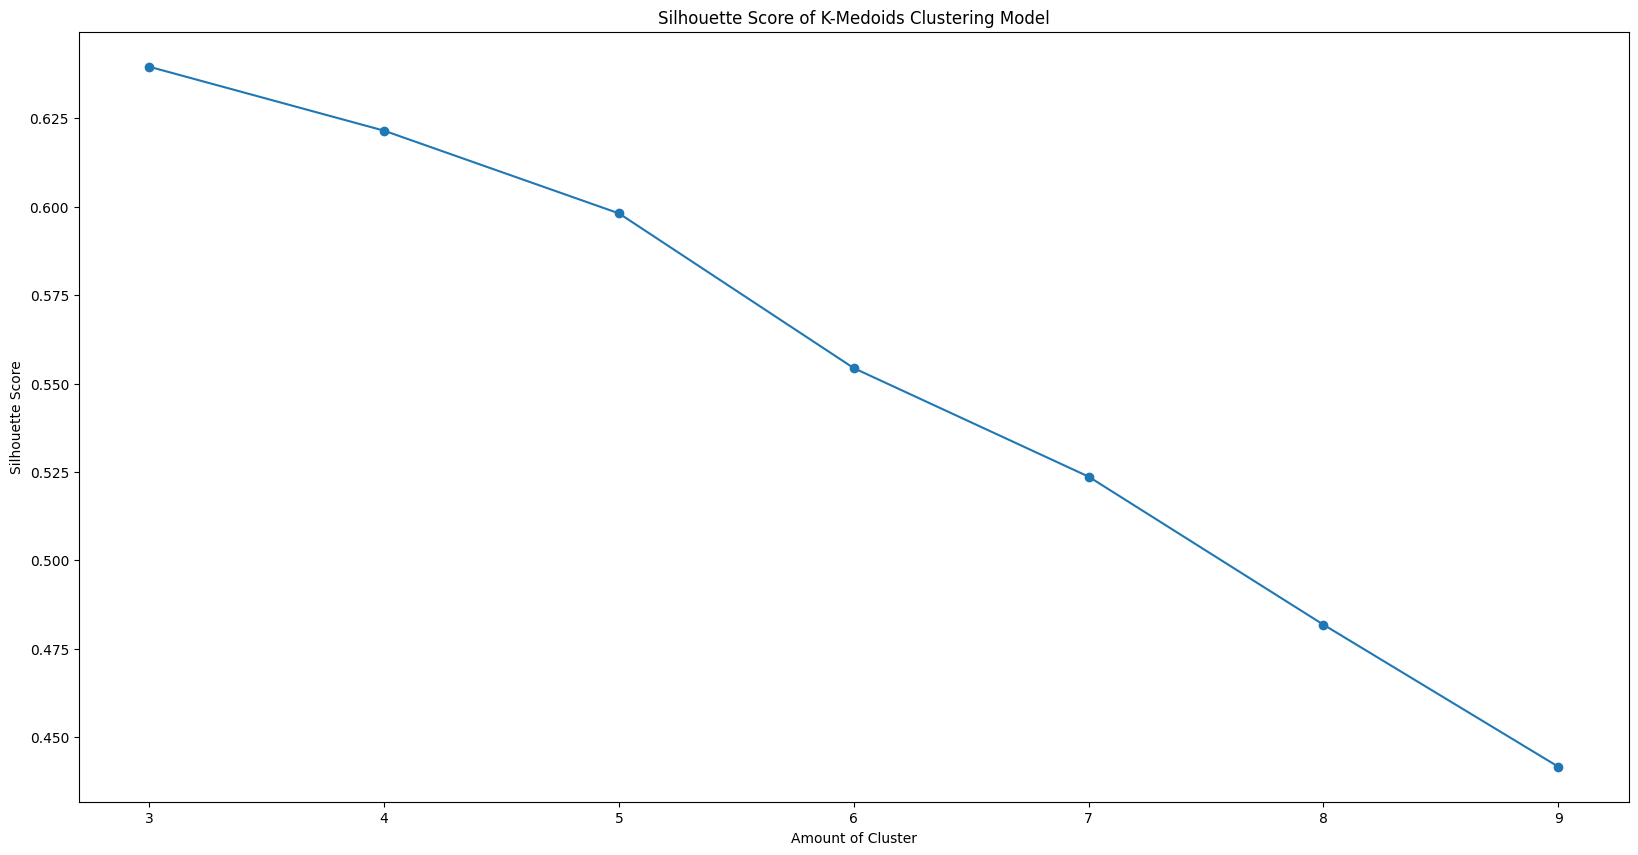

In [82]:
silhouette_scores = []

# Coba berbagai jumlah kluster dari 2 hingga n (misalnya, 6)
n_clusters = range(3, 10)

for n in n_clusters:
    kmedoids = KMedoids(n_clusters=n, random_state=0)
    cluster_labels = kmedoids.fit_predict(cltv)
    silhouette_avg = silhouette_score(cltv, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Membuat plot Silhouette Score
plt.figure(figsize=(20,10))
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Amount of Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score of K-Medoids Clustering Model')
plt.show()

In [83]:
silhouette_scores

[0.6395869445905464,
 0.621502971492413,
 0.5981187798688689,
 0.55435688369624,
 0.5236632691745251,
 0.48180149851936327,
 0.4416371286128823]

### **10.2 Davies_Bouldin Index**

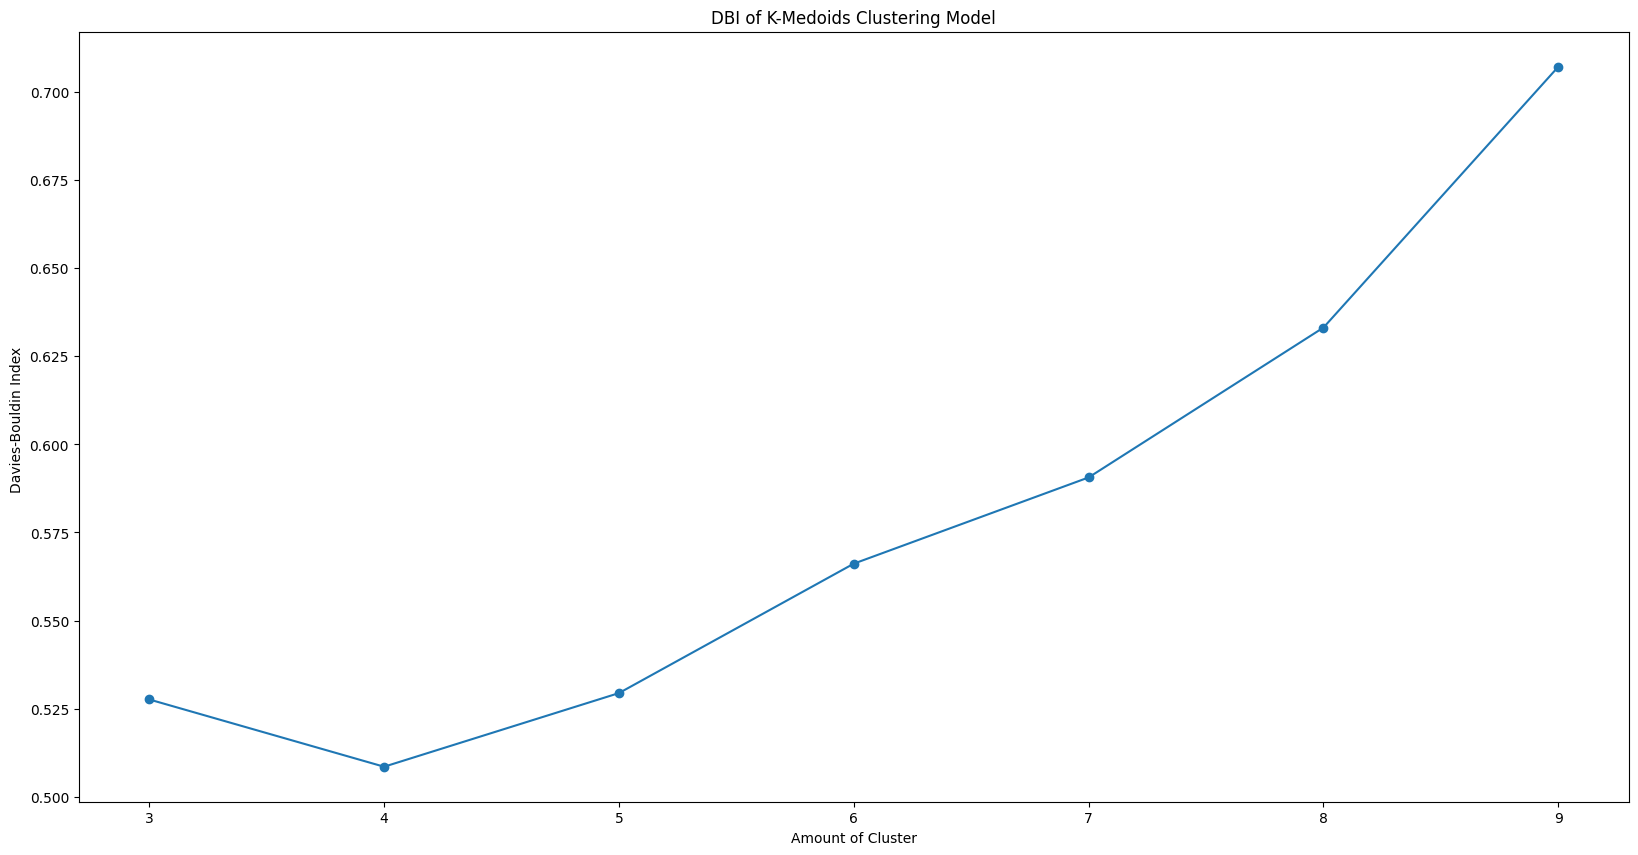

In [84]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
db_scores = []

# Coba berbagai jumlah kluster dari 2 hingga n (misalnya, 6)
n_clusters = range(3, 10)

for n in n_clusters:
    kmedoids = KMedoids(n_clusters=n, random_state=0)
    cluster_labels = kmedoids.fit_predict(cltv)
    db_score = davies_bouldin_score(cltv, cluster_labels)
    db_scores.append(db_score)

# Membuat plot Silhouette Score
plt.figure(figsize=(20,10))
plt.plot(n_clusters, db_scores, marker='o')
plt.xlabel('Amount of Cluster')
plt.ylabel('Davies-Bouldin Index ')
plt.title('DBI of K-Medoids Clustering Model')
plt.show()

In [85]:
db_scores

[0.5275803856119441,
 0.5084816581783951,
 0.5293889052747444,
 0.5661414957933035,
 0.5906265523036982,
 0.6331813023163533,
 0.7072511475736329]

### **11. Distribution Clustering Data Result**

In [86]:
result = data_rfm.groupby(['Cluster'])['Recency', 'Frequency', 'Monetary'].mean()
result = pd.DataFrame(result)
result

C:\Users\Febiansyah\AppData\Local\Temp\ipykernel_19952\2457240711.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = data_rfm.groupby(['Cluster'])['Recency', 'Frequency', 'Monetary'].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,47.689189,17.833333,460.536036
1,48.975130,7.418653,78.869430
2,49.428270,22.158228,1009.027426
3,51.017045,21.474432,1667.619318


In [87]:
data_rfm['Cluster'] = data_rfm['Cluster'].replace(0, 'Need Attention')
data_rfm['Cluster'] = data_rfm['Cluster'].replace(1, 'At Risk')
data_rfm['Cluster'] = data_rfm['Cluster'].replace(2, 'Potential Loyal')
data_rfm['Cluster'] = data_rfm['Cluster'].replace(3, 'Loyal')

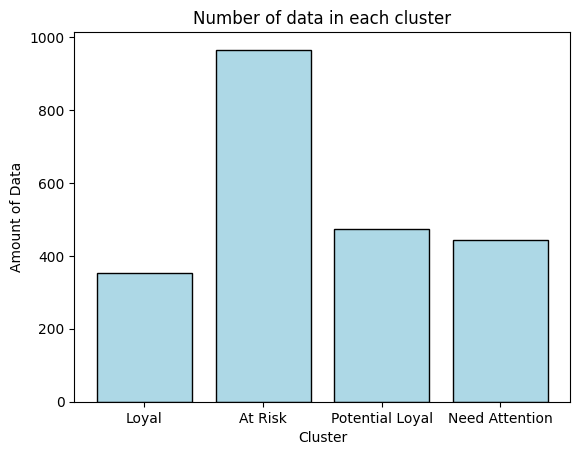

In [88]:
kategori_counts = {}
for k in data_rfm["Cluster"]:
    if k in kategori_counts:
        kategori_counts[k] += 1
    else:
        kategori_counts[k] = 1
kategori_labels = list(kategori_counts.keys())
jumlah_data = list(kategori_counts.values())

# Membuat plot bar
plt.bar(kategori_labels, jumlah_data, edgecolor='k', color= 'lightblue')

# Menambahkan label sumbu
plt.xlabel('Cluster')
plt.ylabel('Amount of Data')
plt.title('Number of data in each cluster')

# Menampilkan plot
plt.show()

In [89]:
jumlah_data

[352, 965, 474, 444]

### **12. Classification Customer Personality Segmentation**

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur (features) dan label (target)
X = data_rfm.drop('Cluster', axis=1)  # X berisi fitur-fitur
y = data_rfm['Cluster']  # y berisi label/target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Inisialisasi dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0) 
model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [91]:
pred = model.predict(X_train)

accuracy = accuracy_score(y_train, pred)
print("Accuracy Training:", accuracy)

print("Classification Report:")
print(classification_report(y_train, pred))

print("Confusion Matrix:")
print(confusion_matrix(y_train, pred))

Accuracy Training: 1.0
Classification Report:
                 precision    recall  f1-score   support

        At Risk       1.00      1.00      1.00       774
          Loyal       1.00      1.00      1.00       273
 Need Attention       1.00      1.00      1.00       358
Potential Loyal       1.00      1.00      1.00       383

       accuracy                           1.00      1788
      macro avg       1.00      1.00      1.00      1788
   weighted avg       1.00      1.00      1.00      1788

Confusion Matrix:
[[774   0   0   0]
 [  0 273   0   0]
 [  0   0 358   0]
 [  0   0   0 383]]


In [92]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Testing:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Testing: 0.9932885906040269
Classification Report:
                 precision    recall  f1-score   support

        At Risk       0.99      1.00      0.99       191
          Loyal       1.00      0.99      0.99        79
 Need Attention       1.00      0.98      0.99        86
Potential Loyal       0.99      1.00      0.99        91

       accuracy                           0.99       447
      macro avg       0.99      0.99      0.99       447
   weighted avg       0.99      0.99      0.99       447

Confusion Matrix:
[[191   0   0   0]
 [  0  78   0   1]
 [  2   0  84   0]
 [  0   0   0  91]]


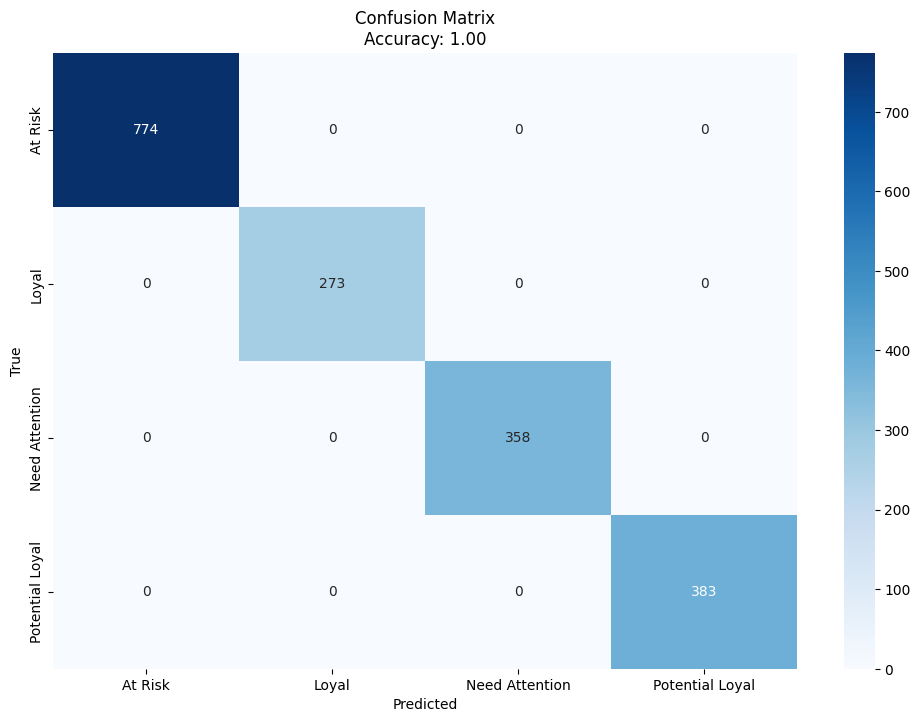

In [93]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh DataFrame

# Mendapatkan matriks konfusi
cm = confusion_matrix(y_train, pred)

accuracy = accuracy_score(y_train, pred)

# Membuat visualisasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["At Risk", "Loyal", "Need Attention", "Potential Loyal"], yticklabels=["At Risk", "Loyal", "Need Attention", "Potential Loyal"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.show()


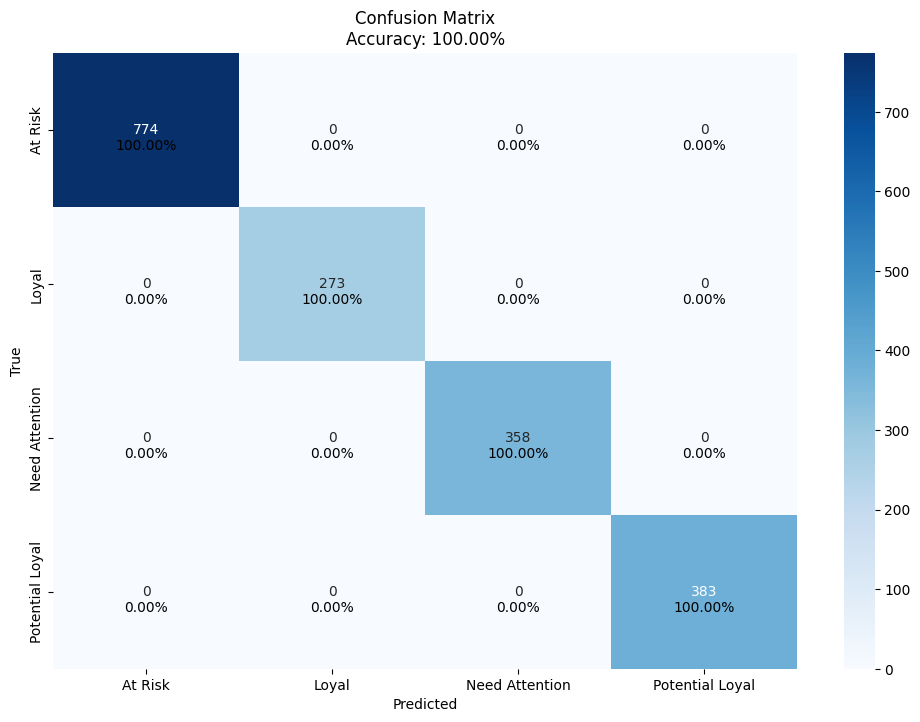

In [94]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_train, pred)

accuracy = accuracy_score(y_train, pred)

plt.figure(figsize=(12, 8))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["At Risk", "Loyal", "Need Attention", "Potential Loyal"],
            yticklabels=["At Risk", "Loyal", "Need Attention", "Potential Loyal"])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2%}')

for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j + 0.5, i + 0.5, f'\n\n{cm[i, j] / sum(cm[i]):.2%}',
                 horizontalalignment='center', verticalalignment='center', color='black')

plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

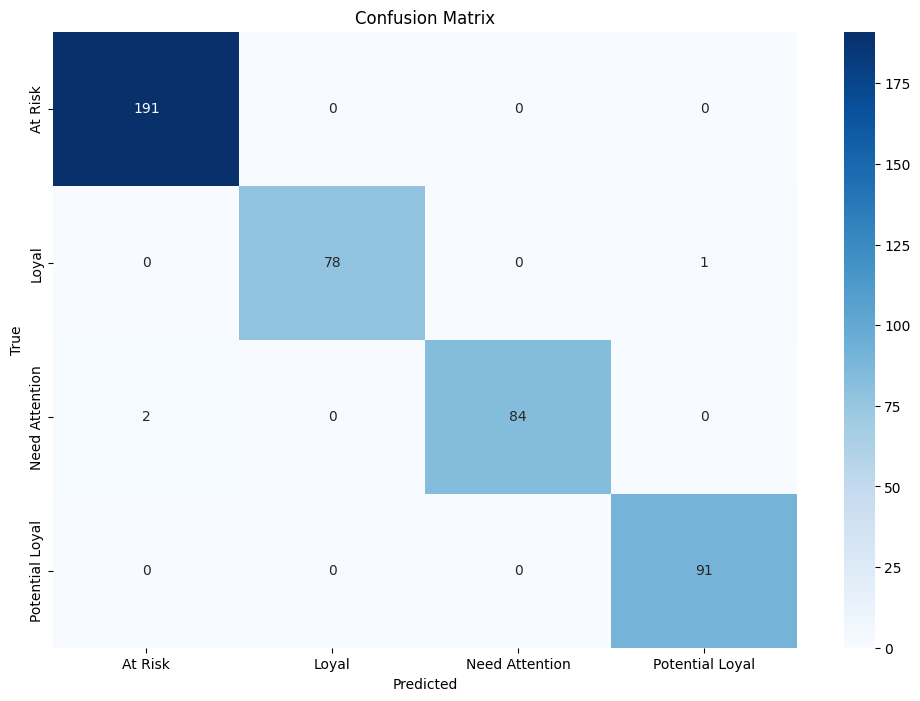

In [95]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh DataFrame

# Mendapatkan matriks konfusi
cm = confusion_matrix(y_test, y_pred)

# Membuat visualisasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["At Risk", "Loyal", "Need Attention", "Potential Loyal"], yticklabels=["At Risk", "Loyal", "Need Attention", "Potential Loyal"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')